<a href="https://colab.research.google.com/github/Nicolas-HGS/Images-Digital-Processing/blob/main/Nearest_neighboor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTATION OF THE LIBRARIES AND MODULES

import cv2
import numpy as np
import matplotlib.pyplot as plt

# DEFINE THE VARIABLE imagem AS A NDARRAY (N-DIMENSIONAL ARRAY) FROM THE LOAD OF THE
# IMAGE CONTAINED IN THE FILE "Imagem_niveis_bits.jpg" IN "grayscale" MODE

imagem = cv2.imread("Imagem_niveis_bits.jpg", cv2.IMREAD_GRAYSCALE)

# Defines whether the factor is to enlarge or reduce the image

# Fator_amp = 2
Fator_red = 2

In [ ]:
# Creation of the variable containing the enlarged image, with its elements of integer type

imagem_dim_mod = np.zeros((Fator_amp*imagem.shape[0],Fator_amp*imagem.shape[1]), dtype = 'int')

In [2]:
# Creation of the variable containing the reduced image, with its elements of integer type
# '//' only takes the integer parts of the division results, without rounding

imagem_dim_mod = np.zeros((imagem.shape[0]//Fator_red,imagem.shape[1]//Fator_red), dtype = 'int')

In [3]:
# Create two variables storing the width and height of the image

largura = imagem.shape[1]
altura = imagem.shape[0]

# Creation of the loop for the technique execution (reduction)

for x in range(imagem_dim_mod.shape[1]): # Scanning of the columns
    for y in range(imagem_dim_mod.shape[0]): # Scanning of the rows

        # Select the position of the pixels of the original image
        # the floor function is used by the library opencv to round
        # the values to integers

        c = int(np.floor(y * Fator_red))
        d = int(np.floor(x * Fator_red))

        imagem_dim_mod[y,x] = imagem[c,d] # Aplication of the technique

In [ ]:
# Creation of the loop for the technique execution (enlargement)

for x in range(imagem_dim_mod.shape[1]): # Scanning of the columns
    for y in range(imagem_dim_mod.shape[0]): # Scanning of the rows

        # Select the position of the pixels of the original image
        # the floor function is used by the library opencv to round
        # the values to integers

        d = int(np.floor(x / Fator_amp))
        c = int(np.floor(y / Fator_amp))

        # serves to limit the position values selected from the origina image
        # so that they don't exceed its original dimensions

        if c>=altura:
            c=altura-1
        if d>=largura:
            d=largura-1

        imagem_dim_mod[y,x] = imagem[c,d] # Aplication of the technique

In [ ]:
# Creation of a variable to store the aplication of the technique on the original image
# using a function of the opencv library

# Enlargement

imagem_biblioteca = cv2.resize(imagem, (Fator_amp*imagem.shape[1],Fator_amp*imagem.shape[0]), interpolation=cv2.INTER_NEAREST)

# Prints the sum of the root mean square error between the values of the
# pixels intensities of the image resulting from the technique by the code implemented
# code and the use of the library

print(np.sum(np.square(np.subtract(imagem_dim_mod,imagem_biblioteca)))/((imagem.shape[0]*Fator_amp)*(imagem.shape[1]*Fator_amp)))

In [4]:
# Creation of a variable to store the aplication of the technique on the original image
# using a function of the opencv library

# Reduction

imagem_biblioteca = cv2.resize(imagem, (imagem.shape[1]//Fator_red,imagem.shape[0]//Fator_red), interpolation=cv2.INTER_NEAREST)

# Prints the sum of the root mean square error between the values of the
# pixels intensities of the image resulting from the technique by the code implemented
# code and the use of the library

print(np.sum(np.square(np.subtract(imagem_dim_mod,imagem_biblioteca)))/((imagem.shape[0]//Fator_red)*(imagem.shape[1]//Fator_red)))

0.0


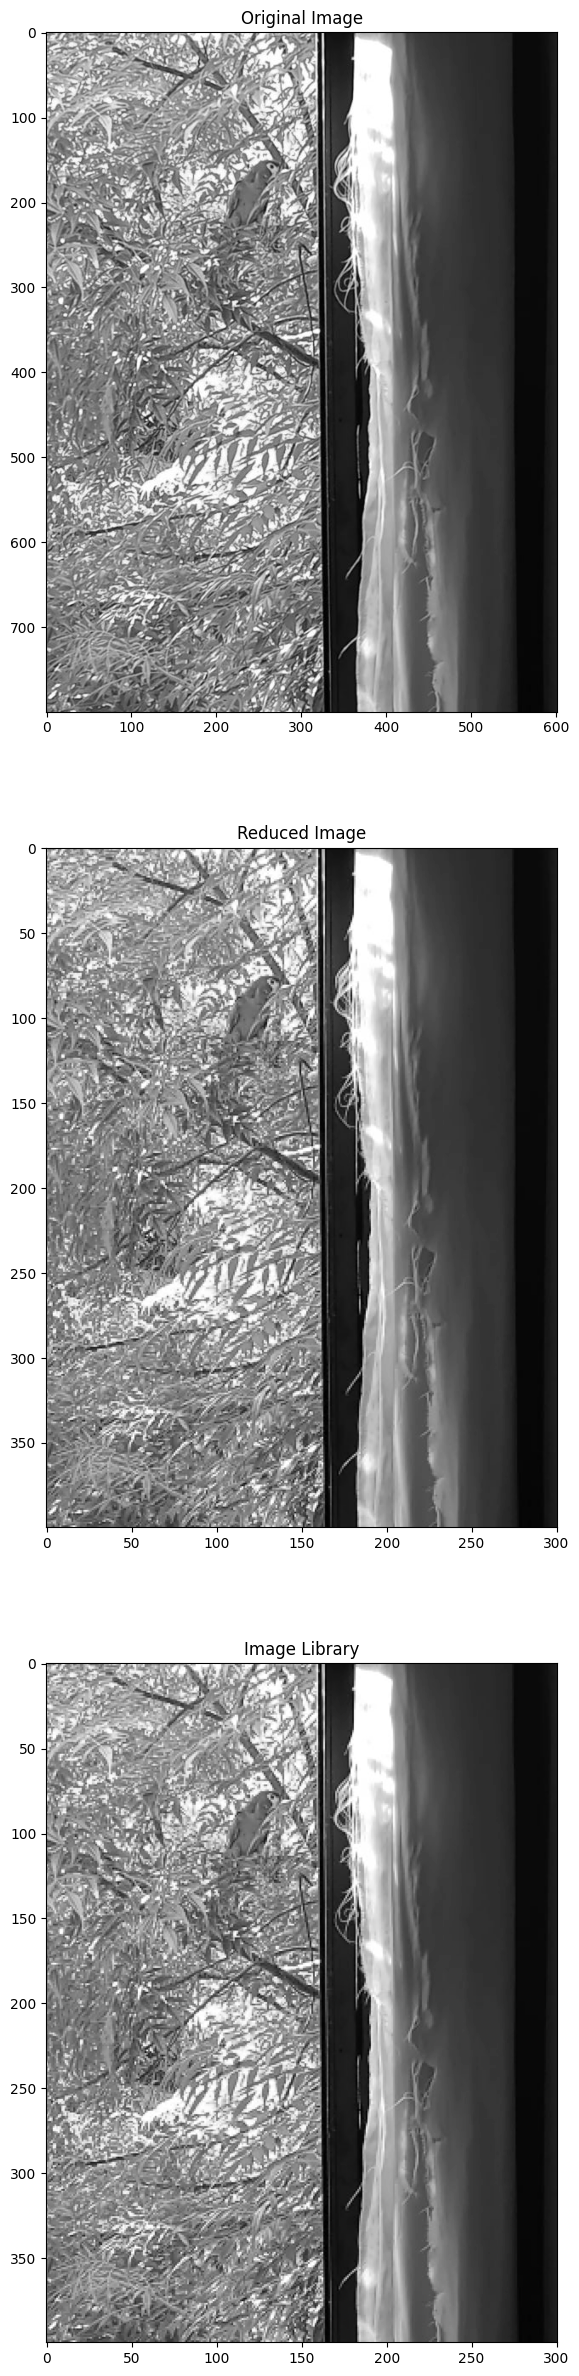

In [7]:
# SET THE FIGURE SIZE IN INCHES, ADJUSTING THE DISPLAYED WIDTH AND THE HEIGHT

figura = plt.figure(figsize=(30, 30))

# DEFINING THE DISPLAY FORM, WITH THREE IMAGES, ONE ON TOP OF THE OTHER

linhas = 3
colunas = 1

# CREATING THE FIRST SUBPLOT TO BE DISPLAYED

figura.add_subplot(linhas, colunas, 1)  # SUBPLOT POSITION
# DEFINES THE DATA THAT WILL BE DISPLAYED AS AN IMAGE, AND IN THIS CASE,
# MONOCHROME IMAGE DUE TO cmap='gray'
plt.imshow(imagem, cmap='gray')
plt.title("Original Image") # IMAGE TITLE

# CREATING THE SECOND SUBPLOT TO BE DISPLAYED IN THE SAME WAY
# AS THE PREVIOUS

figura.add_subplot(linhas, colunas, 2)

plt.imshow(imagem_dim_mod, cmap='gray')
# Choose the title for when the image is enlarged or reduced
# plt.title("Enlarged Image")
plt.title("Reduced Image")

# CREATING THE THIRD SUBPLOT TO BE DISPLAYED IN THE SAME WAY
# AS THE PREVIOUS

figura.add_subplot(linhas, colunas, 3)
plt.imshow(imagem_biblioteca, cmap='gray')
plt.title("Image Library")

# Display of subplots

plt.show()